<a href="https://colab.research.google.com/github/alyshapm/fods/blob/main/FORUM_WK3_FODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling: Global Land Temperatures by Country

> Source: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download **(Berkeley Earth)**

> Group: Alysha, Kim, Sandrian



In [ ]:
# Import libraries
import pandas as pd
import numpy as np

In [ ]:
# Reading the dataset from Kaggle
# https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [ ]:
# Displays the data types of the dataset
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [ ]:
# The date data type is object when it should be datetime
# Converts dt to datetime format
df['dt'] = pd.to_datetime(df['dt'])

In [ ]:
# Displays the data types of the dataset
# Checking to see if dt datatype is already datetime
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

In [ ]:
# Filtering the dataset to only include dates starting from 2013
filtered_df = df.loc[(df['dt'] >= '2013-01-01') & (df['dt'] < '2020-09-1')]

In [ ]:
# Displays the first few rows of the filtered dataset
# Checking if the date is starting from 2013 and not before
filtered_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
3230,2013-01-01,-2.569,0.603,Åland
3231,2013-02-01,-1.782,0.550,Åland
3232,2013-03-01,-4.779,0.698,Åland
3233,2013-04-01,1.701,0.543,Åland
3234,2013-05-01,10.327,0.612,Åland


In [ ]:
# Returns the amount of missing values in the dataset
# Checking to see if interpolation needs to be done
filtered_df.isna().sum()

dt                                 0
AverageTemperature               230
AverageTemperatureUncertainty    222
Country                            0
dtype: int64

> **Linear interpolation** is a method useful to input missing datas and is the most commmonly used. It helps in building new data points within the range of a discrete set of already known data points.



In [ ]:
# 230 missing values in AverageTemperature
# Linear interpolation to fill in the missing values for the AverageTemperature
filtered_df['AverageTemperature'] = filtered_df['AverageTemperature'].interpolate(method="linear")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 222 missing values in AverageTemperatureUncertainty
# Linear interpolation to fill in the missing values of AverageTemperatureUncertainty
filtered_df['AverageTemperatureUncertainty'] = filtered_df['AverageTemperatureUncertainty'].interpolate(method="linear")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
filtered_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
3230,2013-01-01,-2.569,0.603,Åland
3231,2013-02-01,-1.782,0.550,Åland
3232,2013-03-01,-4.779,0.698,Åland
3233,2013-04-01,1.701,0.543,Åland
3234,2013-05-01,10.327,0.612,Åland


In [ ]:
# Checking to see if there are still any missing values
filtered_df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [ ]:
# The describe() gives the insights about the data and some useful statistics about the data such as mean, min and max etc. 
filtered_df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,2187.000000,2187.000000
mean,19.831273,0.554857
std,10.157199,0.346635
min,-29.726000,0.126000
25%,14.847500,0.343250
50%,23.831000,0.455000
75%,27.012000,0.651500
max,38.234000,3.354000


In [ ]:
# Exporting data to new csv file
filtered_df.to_csv('Cleaned_GlobalLandTemperaturesByCountry.csv', index=False)

In [ ]:
# Plot a graph for Indonesia data
filtered_df = filtered_df.loc[filtered_df['Country'] == 'Indonesia']

In [ ]:
filtered_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
248564,2013-01-01,26.403,0.209,Indonesia
248565,2013-02-01,26.209,0.195,Indonesia
248566,2013-03-01,26.934,0.187,Indonesia
248567,2013-04-01,26.628,0.222,Indonesia
248568,2013-05-01,26.818,0.154,Indonesia
248569,2013-06-01,26.881,0.248,Indonesia
248570,2013-07-01,25.902,0.164,Indonesia
248571,2013-08-01,25.961,0.319,Indonesia
248572,2013-09-01,16.815,0.415,Indonesia


In [ ]:
filtered_df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

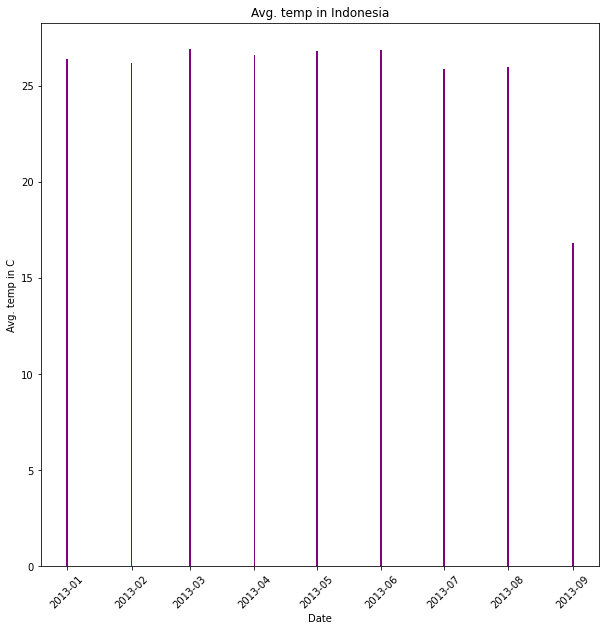

In [ ]:
# Import library to plat data
import matplotlib.pyplot as plt

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(filtered_df['dt'],
        filtered_df['AverageTemperature'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Avg. temp in C",
       title="Avg. temp in Indonesia")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()